In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

$$
\begin{array}{rccc} 
& \text { Signal } & \text { z-Transform } & r_2<|z|<r_1 \\
\hline \text { Linearity: } & a_1 x_1[n]+a_2 x_2[n] & a_1 X_1(z)+a_2 X_2(z) & \mathbb{D}_1 \cap \mathbb{D}_2 \\
\text { Time shifting: } & x[n-k] & z^{-k} X(z) & \left\{\begin{array}{l}
z \neq 0 \text { if } k>0 \\
z \neq \infty \text { if } k<0
\end{array}\right. \\
\text { Scaling: } & a^n x[n] & X\left(a^{-1} z\right) & |a| r_2<|z|<|a| r_1 \\
\text { Time reversal: } & x[-n] & X\left(z^{-1}\right) & \frac{1}{r_1}<|z|<\frac{1}{r_2} \\
\text { Convolution: } & x_1[n] * x_2[n] & X_1(z) X_2(z) & \mathbb{D}_1 \cap \mathbb{D}_2 \\
\text { Multiplication: } & x_1[n] \cdot x_2[n] & \frac{1}{2 \pi i} \oint_C X_1(v) X_2\left(\frac{z}{v}\right) v^{-1} \mathrm{~d} v & r_{1 l} r_{2 l}<|z|<r_{1 u} r_{2 u} \\
\text { Differentiation: } & x[n]-x[n-1] & \frac{z-1}{z} X(z) & \\
\text { initial value: } & x[0]= & \lim _{z \rightarrow \infty} X(z) & \\
\text { final value: } & x[\infty]= & \lim _{z>1}(z-1) X(z) &
\end{array}
$$

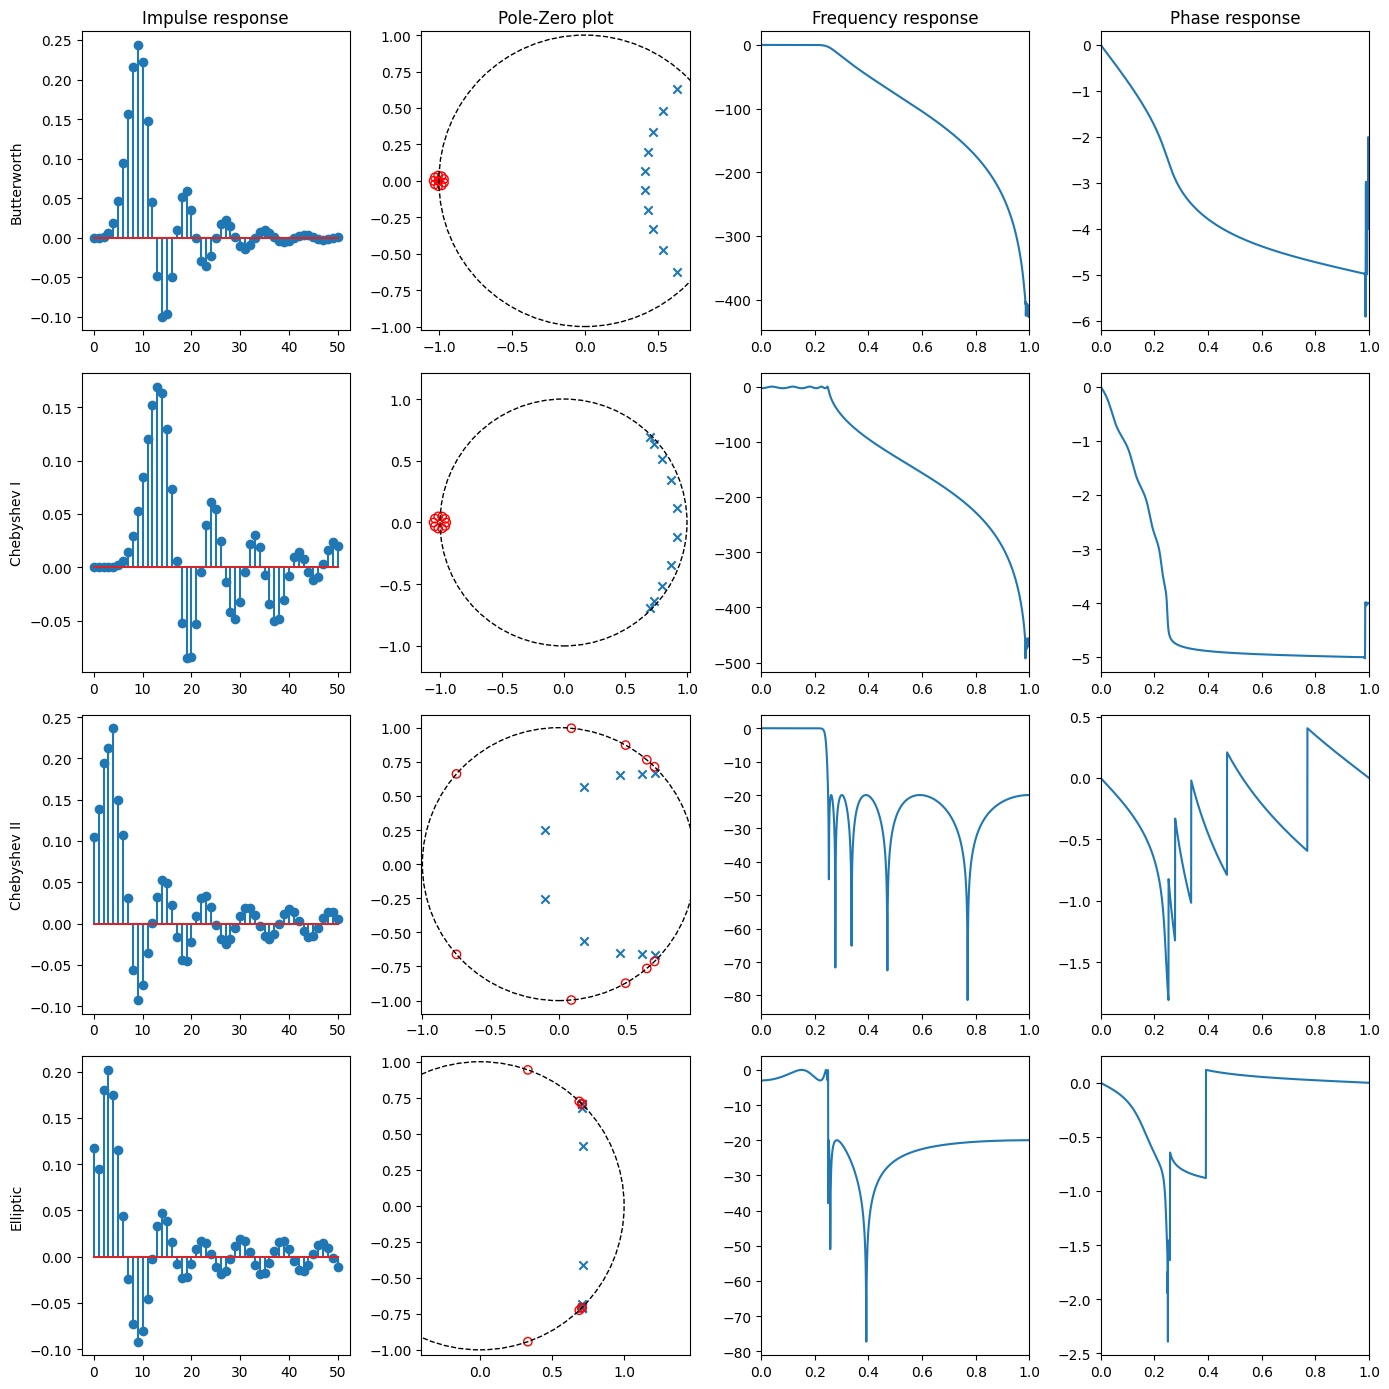

In [2]:
# Define the filter order and cutoff frequency
order = 10
cutoff_freq = 0.25  # Normalized frequency

# Define the types of filters
filters = [
    {"type": "Butterworth", "filter": signal.butter(order, cutoff_freq, btype='low', output='ba')},
    {"type": "Chebyshev I", "filter": signal.cheby1(order, 3, cutoff_freq, btype='low', output='ba')},
    {"type": "Chebyshev II", "filter": signal.cheby2(order, 20, cutoff_freq, btype='low', output='ba')},
    {"type": "Elliptic", "filter": signal.ellip(order, 3, 20, cutoff_freq, btype='low', output='ba')}
]

# Initialize the figure and axes for the 4x4 subplot
fig, axs = plt.subplots(4, 4, figsize=(14, 14))

# Titles for the top
axs[0, 0].set_title("Impulse response")
axs[0, 1].set_title("Pole-Zero plot")
axs[0, 2].set_title("Frequency response")
axs[0, 3].set_title("Phase response")

for i, filt in enumerate(filters):
    b, a = filt['filter']
    t, y = signal.dimpulse((b, a, 1), n=51)
    axs[i, 0].stem(t, np.squeeze(y))  # Use np.squeeze to remove singleton dimensions

    # Pole-Zero plot
    z, p, k = signal.tf2zpk(b, a)
    axs[i, 1].scatter(np.real(p), np.imag(p), marker='x', label='Poles')
    axs[i, 1].scatter(np.real(z), np.imag(z), marker='o', facecolors='none', edgecolors='r', label='Zeros')
    axs[i, 1].add_artist(plt.Circle((0,0),1,fill=False,color='black', linestyle='dashed'))  # Add unit circle
    axs[i, 1].set_aspect('equal', adjustable='datalim')

    # Frequency response (magnitude and phase)
    w, h = signal.freqz(b, a, worN=2000)
    axs[i, 2].plot(w / np.pi, 20 * np.log10(abs(h)))
    axs[i, 2].set_xlim([0, 1])  # Limit frequency range to [0, pi]
    axs[i, 3].plot(w / np.pi, np.unwrap(np.angle(h))/np.pi)  # normalize phase to pi
    axs[i, 3].set_xlim([0, 1])  # Limit frequency range to [0, pi]

    # Set the y-label to filter type for the first column
    axs[i, 0].set_ylabel(f"{filt['type']}")

plt.tight_layout()
plt.show()


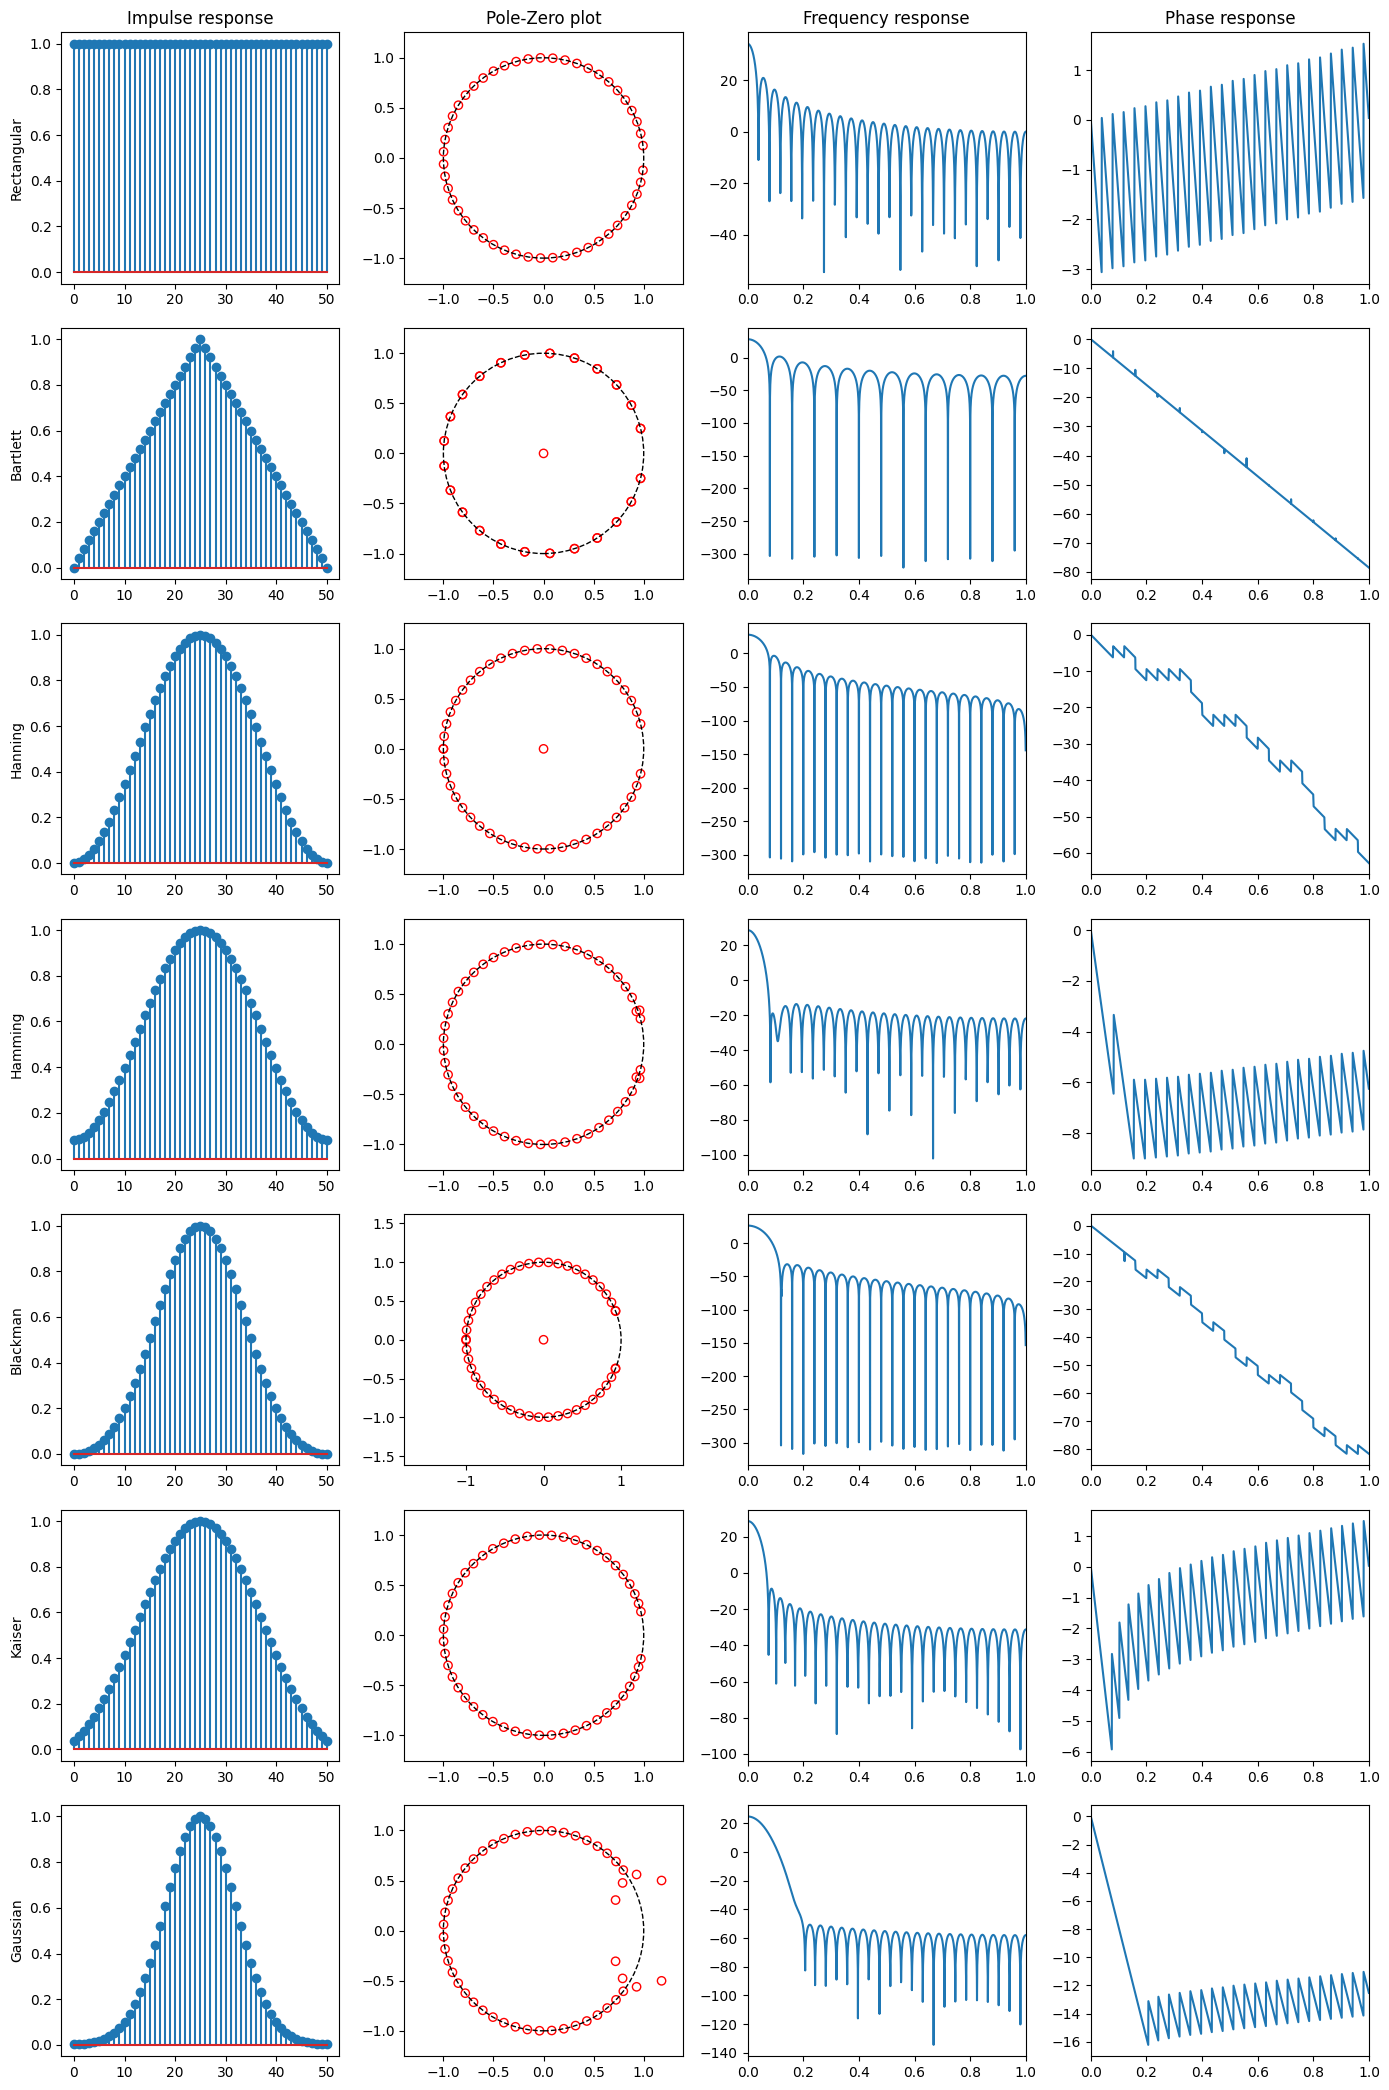

In [3]:
# Define the filter order
order = 51

# Define the types of filters
filters = [
    {"type": "Rectangular", "filter": signal.boxcar(order)},
    {"type": "Bartlett", "filter": signal.bartlett(order)},
    {"type": "Hanning", "filter": signal.hann(order)},
    {"type": "Hamming", "filter": signal.hamming(order)},
    {"type": "Blackman", "filter": signal.blackman(order)},
    {"type": "Kaiser", "filter": signal.kaiser(order, beta=5.0)},  # Beta is a shape parameter
    {"type": "Gaussian", "filter": signal.gaussian(order, std=7)}  # Std defines the width of the Gaussian
]

# Initialize the figure and axes for the 7x4 subplot
fig, axs = plt.subplots(7, 4, figsize=(14, 21))

# Titles for the top
axs[0, 0].set_title("Impulse response")
axs[0, 1].set_title("Pole-Zero plot")
axs[0, 2].set_title("Frequency response")
axs[0, 3].set_title("Phase response")

for i, filt in enumerate(filters):
    b = filt['filter']
    t = np.arange(order)
    axs[i, 0].stem(t, b)  # Use np.squeeze to remove singleton dimensions

    # Pole-Zero plot
    z = np.roots(b)
    axs[i, 1].scatter(np.real(z), np.imag(z), marker='o', facecolors='none', edgecolors='r', label='Zeros')
    axs[i, 1].add_artist(plt.Circle((0,0),1,fill=False,color='black', linestyle='dashed'))  # Add unit circle
    axs[i, 1].set_aspect('equal', adjustable='datalim')
    axs[i, 1].set_xlim([-1.5, 1.5])  # Set x limits
    axs[i, 1].set_ylim([-1.5, 1.5])  # Set y limits

    # Frequency response (magnitude and phase)
    w, h = signal.freqz(b, 1, worN=2000)
    axs[i, 2].plot(w / np.pi, 20 * np.log10(abs(h)))
    axs[i, 2].set_xlim([0, 1])  # Limit frequency range to [0, pi]
    axs[i, 3].plot(w / np.pi, np.unwrap(np.angle(h)))
    axs[i, 3].set_xlim([0, 1])  # Limit frequency range to [0, pi]

    # Set the y-label to filter type for the first column
    axs[i, 0].set_ylabel(f"{filt['type']}")

plt.tight_layout()
plt.show()

/var/folders/yl/_h6j91qd4d30w8vyy7hnlvjh0000gn/T/ipykernel_49788/594120088.py:45: RuntimeWarning: divide by zero encountered in log10
  axs[i, 1].plot(w / np.pi, 20 * np.log10(abs(h)))


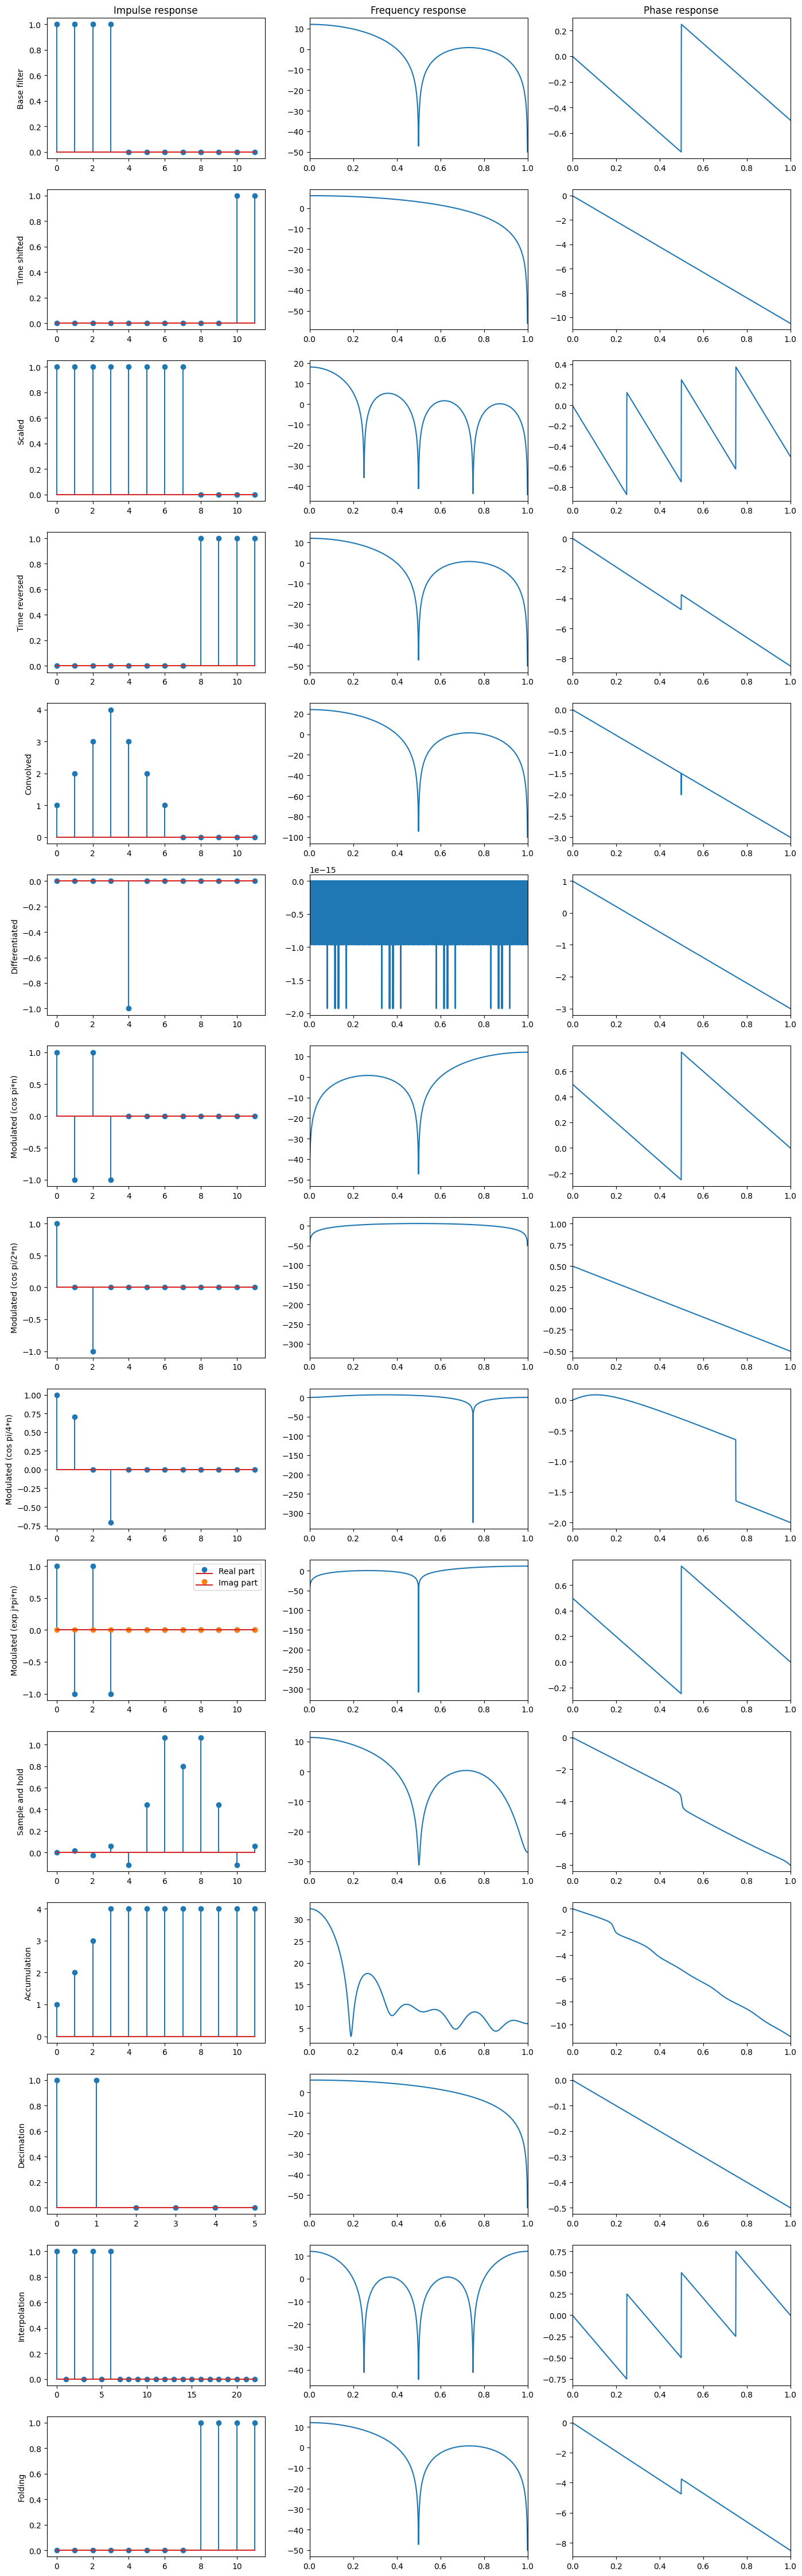

In [4]:
# Define base filter
base_filter = np.concatenate([np.ones(4), np.zeros(8)])

# Adjust the filters
filters = [
    {"type": "Base filter", "filter": base_filter},
    {"type": "Time shifted", "filter": np.concatenate([np.zeros(10), base_filter[:2]])},
    {"type": "Scaled", "filter": np.repeat(base_filter, 2)[:len(base_filter)]},
    {"type": "Time reversed", "filter": base_filter[::-1]},
    {"type": "Convolved", "filter": np.convolve(base_filter, base_filter)[:len(base_filter)]},
    {"type": "Differentiated", "filter": np.concatenate([[0], np.diff(base_filter)])},
    {"type": "Modulated (cos pi*n)", "filter": base_filter * np.cos(np.pi * np.arange(len(base_filter)))},
    {"type": "Modulated (cos pi/2*n)", "filter": base_filter * np.cos(np.pi/2 * np.arange(len(base_filter)))},
    {"type": "Modulated (cos pi/4*n)", "filter": base_filter * np.cos(np.pi/4 * np.arange(len(base_filter)))},
    {"type": "Modulated (exp j*pi*n)", "filter": base_filter * np.exp(1j * np.pi * np.arange(len(base_filter)))},
    {"type": "Sample and hold", "filter": np.convolve(base_filter, np.sinc(np.linspace(-6, 6, len(base_filter))), mode='full')[:len(base_filter)]},
    {"type": "Accumulation", "filter": np.cumsum(base_filter)},
    {"type": "Decimation", "filter": base_filter[::2]},
    {"type": "Interpolation", "filter": np.insert(base_filter, slice(1, None), 0)},
    {"type": "Folding", "filter": base_filter[::-1]}
]

# Initialize the figure and axes for the 15x3 subplot
fig, axs = plt.subplots(len(filters), 3, figsize=(14, 3*len(filters)))

# Titles for the top
axs[0, 0].set_title("Impulse response")
axs[0, 1].set_title("Frequency response")
axs[0, 2].set_title("Phase response")

for i, filt in enumerate(filters):
    b = filt['filter']
    t = np.arange(len(b))

    # Check if the filter is complex
    if np.iscomplexobj(b):
        axs[i, 0].stem(t, np.real(b), linefmt='C0-', markerfmt='C0o', label='Real part')
        axs[i, 0].stem(t, np.imag(b), linefmt='C1-', markerfmt='C1o', label='Imag part')
        axs[i, 0].legend()
    else:
        axs[i, 0].stem(t, b)  # Use np.squeeze to remove singleton dimensions

    # Frequency response (magnitude and phase)
    w, h = signal.freqz(b, 1, worN=2000)
    axs[i, 1].plot(w / np.pi, 20 * np.log10(abs(h)))
    axs[i, 1].set_xlim([0, 1])  # Limit frequency range to [0, pi]
    axs[i, 2].plot(w / np.pi, np.unwrap(np.angle(h))/np.pi)  # normalize phase to pi
    axs[i, 2].set_xlim([0, 1])  # Limit frequency range to [0, pi]

    # Set the y-label to filter type for the first column
    axs[i, 0].set_ylabel(f"{filt['type']}")

plt.tight_layout()
plt.show()
